In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from tqdm import tqdm

import hrv_analysis as hrv
import optical_gating_analysis as OG

import j_py_sad_correlation as jps

import tifffile as tf
import glob

In [17]:
files_src = r"D:\5-7 heart piv multi or\bad sync\piv 1\Allied Vision Technologies GS650 0001f61c\*tif"
files = glob.glob(files_src)

delta_phases = []
for file_src in tqdm(files):
    oog = OG.BasicOpticalGating()
    oog.settings["progress_bars"] = False
    oog.settings["show_status"] = False
    oog.sequence_manager.set_source(file_src)
    oog.run()
    delta_phases.extend(oog.delta_phases)

100%|██████████| 90/90 [01:41<00:00,  1.12s/it]


(0.0, 0.4)

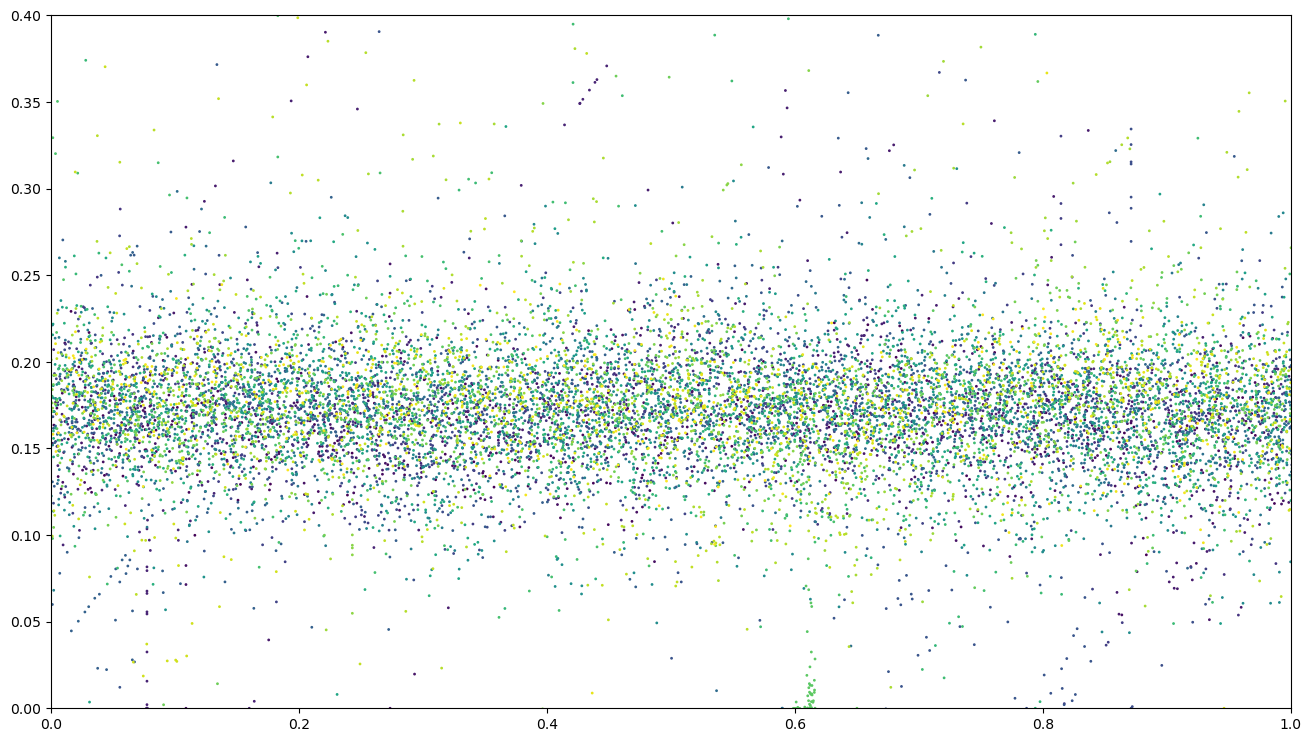

In [45]:
plt.figure(figsize = (16,9))
plt.scatter(np.cumsum(delta_phases) % (2 * np.pi), delta_phases, s = 1, c = range(len(delta_phases)))
plt.xlim(0,1)
plt.ylim(0,0.4)

In [43]:
data = OG.SequenceManager.load_tif(files_src)
data_sorted = data[(np.argsort(np.cumsum(delta_phases) % (2 * np.pi)))]
tf.imwrite(r"sorted.tif", data_sorted.astype(np.uint16))

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"D:\5-7 heart piv multi or\bad sync\piv 1\Allied Vision Technologies GS650 0001f61c\*tif")
oog.run()

Setting source to D:\5-7 heart piv multi or\bad sync\piv 1\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence Reference period: 36.611022300375666; Reference indices: [9, 50]


Getting SADs: 100%|██████████| 90/90 [01:02<00:00,  1.44it/s]


Getting phases


ValueError: x and y must be the same size

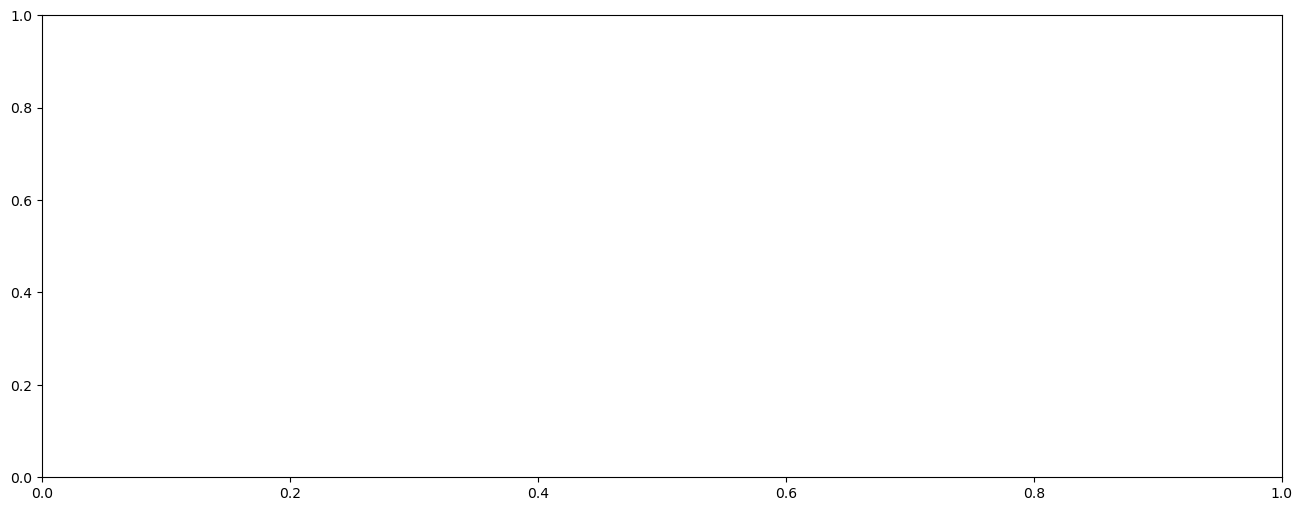

In [20]:
plt.figure(figsize = (16,6))
plt.scatter(oog.phases[0:1000], oog.delta_phases[0:1000], s = 2)
plt.show()